<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-:-a-visual-intuition-of-activation-functions" data-toc-modified-id="Introduction-:-a-visual-intuition-of-activation-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction : a visual intuition of activation functions</a></span></li><li><span><a href="#Build-an-MLP-to-classify-MNIST-images" data-toc-modified-id="Build-an-MLP-to-classify-MNIST-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build an MLP to classify MNIST images</a></span></li></ul></div>

# Introduction to the Multi Layer Perceptron

## Introduction : a visual intuition of activation functions

Using a regression task on the sinus function, we'll try to get an intuition of the effect of activation functions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

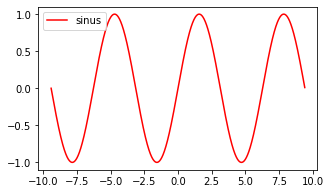

In [12]:
X = np.arange(-3*np.pi,3*np.pi,0.01)
y = np.sin(X)

plt.figure(figsize=(5,3))
plt.plot(X, y, label='sinus', color='red')
plt.legend()
plt.show()

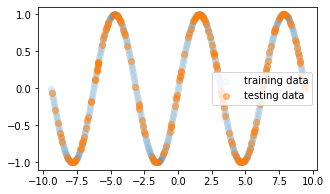

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

plt.figure(figsize=(5,3))
plt.scatter(X_train, y_train, alpha = 0.03, label='training data')
plt.scatter(X_test, y_test,alpha=0.5,label='testing data')

plt.legend()
plt.show()

$$[TODO - Students]$$

* Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train.
* What activation should we use for ouput layer ?
###Answer: I tried different models below. None of them works well because I used only 1 layer. Sigmoid could be the best of them.
* What loss should we use ?
###Answer: mean squared error seems good.
* Try different activations for the hidden layer and plot the predictions obtained on x_test
* Plot also a learning curve

In [14]:
X_train.shape

(1696,)

In [8]:
import keras

##1. SIGMOID

In [64]:
#Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train:

inputs = keras.Input(shape=(1, ))
outputs = Dense(1, activation='sigmoid')(inputs)

model = keras.Model(inputs, outputs)

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_split=0.33)

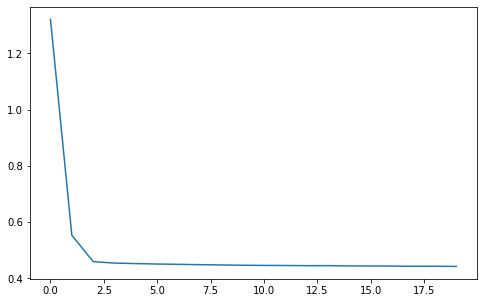

In [41]:
# Plot leaning cuve
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.show()

In [25]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

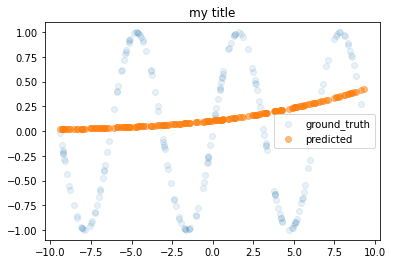

In [26]:
plot_prediction("my title", model)

##2. RELU


In [ ]:
#Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train:

inputs = keras.Input(shape=(1, ))
outputs = Dense(1, activation='relu')(inputs)

model = keras.Model(inputs, outputs)

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_split=0.33)

In [ ]:
# Plot leaning cuve
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.show()

In [21]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

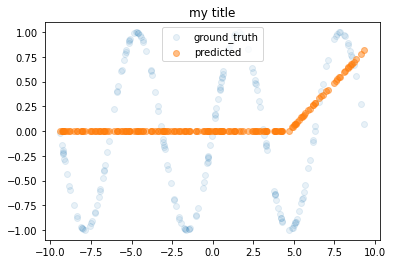

In [22]:
plot_prediction("my title", model)

##3. Tanh

In [ ]:
#Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train:

inputs = keras.Input(shape=(1, ))
outputs = Dense(1, activation='tanh')(inputs)

model = keras.Model(inputs, outputs)

model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, validation_split=0.33)

In [ ]:
# Plot leaning cuve
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.show()

In [29]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

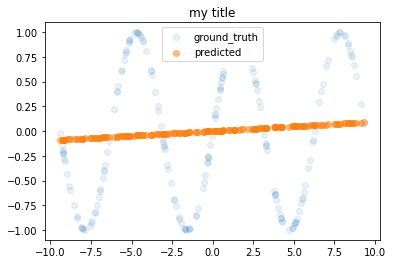

In [30]:
plot_prediction("my title", model)

#Teacher's Slack Code:

In [ ]:
input = Input(shape=(1,), name='input')
# One hidden layer with 1 neuron
x_sig = Dense(1, activation='sigmoid', name='layer_1')(input)
out_sig = Dense(1, activation='linear', name='output')(x_sig)
model_sig = Model(input, out_sig)
model_sig.compile(loss='mse', optimizer='adam')
model_sig.summary()
history_sig = model_sig.fit(X_train, y_train, epochs=20)
plt.figure(figsize=(8,5))
plt.plot(history_sig.history['loss'], label='sigmoid')
plt.legend()
plt.show()
plot_prediction('sigmoid', model_sig)

$$[TODO - Students]$$

Try adding layers and increasing the layers dimension to better fit the test data. You can use the following function to quickly build your models.

* Try different n_layers (for example 1, 10, 100)
* Try different hidden_dim (for example 32, 128, 256, 512)
* Try different bach size
* Try to understand the `patience` parameters of early stopping

#n_layers = 1, hidden_dim = 32

In [15]:
def build_sin_regression(activation, n_layers, hidden_dim):
    input = Input(shape=(1,), name='input')

    for i in range(n_layers):
      if i==0:
        x = Dense(input_shape=(1,), units=hidden_dim, activation=activation, name='layer_'+str(i))(input)
      else:
        x = Dense(units=hidden_dim, activation=activation, name='layer_'+str(i))(x)

    output = Dense(1, activation='linear', name='output')(x)
    model = Model(input, output, name = 'sinus_regression')
    return model

In [21]:
model = build_sin_regression(activation = 'sigmoid', n_layers = 3, hidden_dim = 32)
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 32)                64        
                                                                 
 layer_1 (Dense)             (None, 32)                1056      
                                                                 
 layer_2 (Dense)             (None, 32)                1056      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model)

In [23]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 1s 5ms/step - loss: 0.5152 - val_loss: 0.5015
Epoch 2/20
48/48 [==============================] - 0s 3ms/step - loss: 0.4832 - val_loss: 0.4880
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4775 - val_loss: 0.4839
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 0.4764 - val_loss: 0.4852
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4762 - val_loss: 0.4809
Epoch 6/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4775 - val_loss: 0.4839
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4754 - val_loss: 0.4789
Epoch 8/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4746 - val_loss: 0.4837
Epoch 9/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4726 - val_loss: 0.4860
Epoch 10/20
48/48 [==============================] - 0s 2ms/step - loss: 0.4700 - val_loss: 0.4783
Epoch 11/20
48/48 [

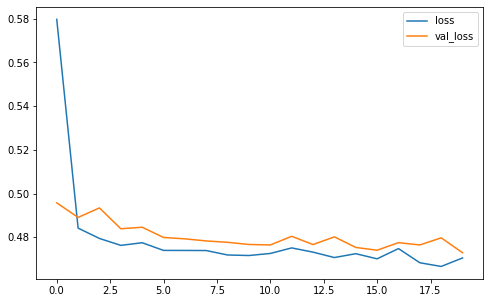

In [18]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

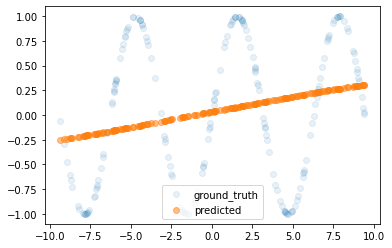

In [19]:
y_hat_test = model.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

#n_layers = 10, hidden_dim = 32

In [ ]:
model2 = build_sin_regression(activation = 'sigmoid', n_layers = 10, hidden_dim = 32)
model2.compile(loss='mse', optimizer='adam')
model2.summary()

In [ ]:
plot_model(model2)

In [53]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model2.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

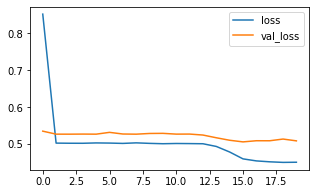

In [57]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

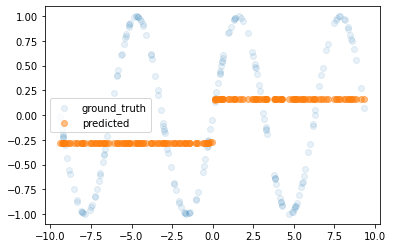

In [55]:
y_hat_test = model2.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

#n_layers = 10, hidden_dim = 128

In [ ]:
model3 = build_sin_regression(activation = 'sigmoid', n_layers = 10, hidden_dim = 128)
model3.compile(loss='mse', optimizer='adam')
model3.summary()

In [ ]:
plot_model(model3)

In [ ]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model3.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

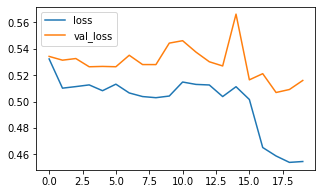

In [60]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

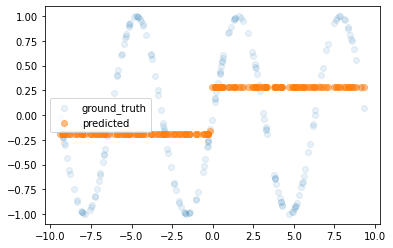

In [61]:
y_hat_test = model3.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

## Build an MLP to classify MNIST images

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We’ll call the images “x” and the labels “y”. Both the training set and test set contain images and their corresponding labels; for example, the training images are mnist.train.images and the training labels are mnist.train.labels.

In [100]:
# Load dataset
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between a train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [101]:
# Reshape the image from 3d to 2d (nb_items, other dime)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

(60000, 784)


In [102]:
# Normalize the data (input between 0 and 1)
X_train = X_train /255
X_test = X_test /255

In [ ]:
#!pip install np_utils


In [79]:
keras.__version__

'2.7.0'

In [93]:
# One hot encode the label
import numpy as np
from tensorflow.python import keras
#from tensorflow.keras.utils import to_categorical

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)



In [105]:
# Buid MLP model
# You can use the following function
def build_MLP(input_shape, activation, layers, nb_class):
    input = Input(shape=(input_shape,), name='input')

    for i, hidden_size in enumerate(layers):
        if i == 0:
            x = Dense(input_shape=(input_shape,), units=hidden_size, activation=activation, name='layer_'+str(i))(input)
        else:
            x = Dense(units=hidden_size, activation=activation, name='layer_'+str(i))(x)

    output = Dense(nb_class, activation='softmax', name='output')(x)
    model = Model(input, output, name = 'mnist_classifier')
    model.summary()
    return model

model = build_MLP(784, 'relu', [5], 10)

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 layer_0 (Dense)             (None, 5)                 3925      
                                                                 
 output (Dense)              (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [107]:
# Compile and fit the model
callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
history = model.fit(X_train, Y_train, validation_split = 0.1, callbacks=callbacks_list,
                    batch_size=32, epochs=20)

In [108]:
# Print history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

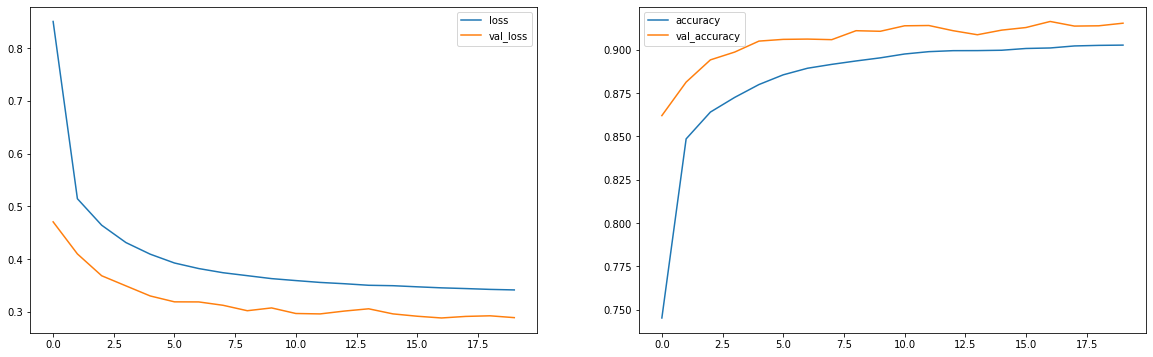

In [110]:
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [112]:
# Evaluate the model
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.9019
Test loss: 0.34970879554748535
Test accuracy 0.9018999934196472


In [ ]:
# Modify the network in order to obtain better accuracy (better than 0.96)

# Modify the network in order to obtain better accuracy (better than 0.96)

I used one input layer, 1 hidden layer and one output layer. The modification was changing the hidden layer's output dimension from 5 to 100. These way, hidden layer can learn the mnsit shapes up to 100. The accuracy increased from 0.901 to 0.975

In [116]:
model = build_MLP(784, 'relu', [100], 10)


Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 layer_0 (Dense)             (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [117]:
# Compile and fit the model
callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
history = model.fit(X_train, Y_train, validation_split = 0.1, callbacks=callbacks_list,
                    batch_size=32, epochs=20)

In [118]:
# Evaluate the model
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1057 - accuracy: 0.9759
Test loss: 0.10565713793039322
Test accuracy 0.9758999943733215
